# Task 3 - Feature Engineering

importing necessary libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA




In [2]:
def load_data2(file_path):
    return pd.read_csv(file_path)

# Load data2
file_path = '../data/data2.csv'
data = load_data2(file_path)

In [3]:
def data2_columnROW(data):
    num_rows, num_cols = data.shape
    data_types = data.dtypes

    print(f"Number of rows: {num_rows}\nNumber of columns: {num_cols}\n")
    print("Data types:")
    print(data_types)
    print("\n")

# Display overview of rows and columns
data2_columnROW(data)

Number of rows: 95662
Number of columns: 16

Data types:
TransactionId             int64
BatchId                   int64
AccountId                 int64
SubscriptionId            int64
CustomerId                int64
CurrencyCode             object
CountryCode               int64
ProviderId                int64
ProductId                 int64
ProductCategory          object
ChannelId                 int64
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object




Create aggregate features for each customer

In [5]:
def create_aggregate_features(data):
    data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
    aggregate_features = data.groupby('AccountId').agg(
        TotalTransactionAmount=('Amount', 'sum'),
        AverageTransactionAmount=('Amount', 'mean'),
        TransactionCount=('Amount', 'count'),
        StdDevTransactionAmount=('Amount', 'std')
    ).reset_index()
    return aggregate_features

# Feature Engineering
aggregate_features = create_aggregate_features(data)
print("Aggregate Features:")
print(aggregate_features.head())

Aggregate Features:
   AccountId  TotalTransactionAmount  AverageTransactionAmount  \
0          1                 70000.0              23333.333333   
1          2                 70000.0              35000.000000   
2          3                  5000.0               5000.000000   
3          4                 62000.0              62000.000000   
4          5                 40000.0              20000.000000   

   TransactionCount  StdDevTransactionAmount  
0                 3              5773.502692  
1                 2                 0.000000  
2                 1                      NaN  
3                 1                      NaN  
4                 2                 0.000000  


Extract Time Features:

 Extract Transaction Hour, Day, Month, Year

In [6]:

def extract_time_features(data):
    data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])
    data['TransactionHour'] = data['TransactionStartTime'].dt.hour
    data['TransactionDay'] = data['TransactionStartTime'].dt.day
    data['TransactionMonth'] = data['TransactionStartTime'].dt.month
    data['TransactionYear'] = data['TransactionStartTime'].dt.year
    return data

# Feature Extraction
data = extract_time_features(data)
print("Data with Time Features:")
print(data[['TransactionStartTime', 'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear']].head())

Data with Time Features:
       TransactionStartTime  TransactionHour  TransactionDay  \
0 2018-11-15 02:18:49+00:00                2              15   
1 2018-11-15 02:19:08+00:00                2              15   
2 2018-11-15 02:44:21+00:00                2              15   
3 2018-11-15 03:32:55+00:00                3              15   
4 2018-11-15 03:34:21+00:00                3              15   

   TransactionMonth  TransactionYear  
0                11             2018  
1                11             2018  
2                11             2018  
3                11             2018  
4                11             2018  


Encode Categorical Variables

Identify categorical features

In [9]:
def Identify_categorical_features(data):
 categorical_features = data.select_dtypes(include=['object']).columns.tolist()
 print(f"Categorical Features: {categorical_features}")
 
Identify_categorical_features(data)

Categorical Features: ['CurrencyCode', 'ProductCategory']


 Encode Categorical Variables: One-Hot Encoding

In [7]:
# Encode Categorical Variables: One-Hot Encoding
def one_hot_encode(data, categorical_features):
    data = pd.get_dummies(data, columns=categorical_features)
    return data

categorical_features = data.select_dtypes(include=['object']).columns.tolist()
data_one_hot_encoded = one_hot_encode(data, categorical_features)
print("One-Hot Encoded Data:")
print(data_one_hot_encoded.head())

One-Hot Encoded Data:
   TransactionId  BatchId  AccountId  SubscriptionId  CustomerId  CountryCode  \
0          76871    36123       3957             887        4406          256   
1          73770    15642       4841            3829        4406          256   
2          26203    53941       4229             222        4683          256   
3            380   102363        648            2185         988          256   
4          28195    38780       4841            3829         988          256   

   ProviderId  ProductId  ChannelId   Amount  ...  CurrencyCode_UGX  \
0           6         10          3   1000.0  ...              True   
1           4          6          2    -20.0  ...              True   
2           6          1          3    500.0  ...              True   
3           1         21          3  20000.0  ...              True   
4           4          6          2   -644.0  ...              True   

  ProductCategory_airtime  ProductCategory_data_bundles  \
0    

 Encode Categorical Variables: Label Encoding

In [8]:
# Encode Categorical Variables: Label Encoding
def label_encode(data, categorical_features):
    le = LabelEncoder()
    for feature in categorical_features:
        data[feature] = le.fit_transform(data[feature].astype(str))
    return data

data_label_encoded = label_encode(data, categorical_features)
print("Label Encoded Data:")
print(data_label_encoded.head())

Label Encoded Data:
   TransactionId  BatchId  AccountId  SubscriptionId  CustomerId  \
0          76871    36123       3957             887        4406   
1          73770    15642       4841            3829        4406   
2          26203    53941       4229             222        4683   
3            380   102363        648            2185         988   
4          28195    38780       4841            3829         988   

   CurrencyCode  CountryCode  ProviderId  ProductId  ProductCategory  ...  \
0             0          256           6         10                0  ...   
1             0          256           4          6                2  ...   
2             0          256           6          1                0  ...   
3             0          256           1         21                8  ...   
4             0          256           4          6                2  ...   

    Amount  Value      TransactionStartTime PricingStrategy  FraudResult  \
0   1000.0   1000 2018-11-15 02:

In [12]:
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,76871,36123,3957,887,4406,0,256,6,10,0,3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,2,15,11,2018
1,73770,15642,4841,3829,4406,0,256,4,6,2,2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,2,15,11,2018
2,26203,53941,4229,222,4683,0,256,6,1,0,3,500.0,500,2018-11-15 02:44:21+00:00,2,0,2,15,11,2018
3,380,102363,648,2185,988,0,256,1,21,8,3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,3,15,11,2018
4,28195,38780,4841,3829,988,0,256,4,6,2,2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,3,15,11,2018


Handle Missing Values


by using imputation

In [14]:
def handle_missing_values(data, strategy='mean'):
    numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
    imputer = SimpleImputer(strategy=strategy)
    data[numerical_features] = imputer.fit_transform(data[numerical_features])
    return data

# Handle Missing Values
data = handle_missing_values(data, strategy='mean')


In [15]:
def identify_missing_values(data):
    missing_values = data.isnull().sum()
    print("Missing Values:")
    print(missing_values[missing_values > 0])
    print("\n")
# Identify missing values
identify_missing_values(data)

Missing Values:
Series([], dtype: int64)




In [5]:
data.isna().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
Recency                 0
Frequency               0
Monetary                0
Month                   0
Seasonality             0
dtype: int64

# Normalize/Standardize Numerical Features
Normalization and standardization are scaling techniques used to bring all numerical features onto a similar scale.


Normalize Features:

In [16]:
def normalize_features(data):
    numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
    scaler = MinMaxScaler()
    data[numerical_features] = scaler.fit_transform(data[numerical_features])
    return data

# Normalize Features
normalized_data = normalize_features(data.copy())
print("Normalized Data:")
print(normalized_data.head())

Normalized Data:
   TransactionId   BatchId  AccountId  SubscriptionId  CustomerId  \
0       0.546417  0.258949   0.817355        0.183078    0.589061   
1       0.524374  0.112122   1.000000        0.791684    0.589061   
2       0.186252  0.386684   0.873554        0.045511    0.626103   
3       0.002694  0.733818   0.133678        0.451593    0.131987   
4       0.200412  0.277996   1.000000        0.791684    0.131987   

   CurrencyCode  CountryCode  ProviderId  ProductId  ProductCategory  \
0           0.0          0.0         1.0   0.346154             0.00   
1           0.0          0.0         0.6   0.192308             0.25   
2           0.0          0.0         1.0   0.000000             0.00   
3           0.0          0.0         0.0   0.769231             1.00   
4           0.0          0.0         0.6   0.192308             0.25   

   ChannelId    Amount     Value      TransactionStartTime  PricingStrategy  \
0       0.50  0.092004  0.000101 2018-11-15 02:18:49+00:

Standardize Features:

In [17]:
def standardize_features(data):
    numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
    scaler = StandardScaler()
    data[numerical_features] = scaler.fit_transform(data[numerical_features])
    return data

# Standardize Features
standardized_data = standardize_features(data.copy())
print("Standardized Data:")
print(standardized_data.head())

Standardized Data:
   TransactionId   BatchId  AccountId  SubscriptionId  CustomerId  \
0       0.160893 -0.847664   0.381677       -1.650828    0.774769   
1       0.084563 -1.352296   0.948332        0.622801    0.774769   
2      -1.086272 -0.408646   0.556032       -2.164752    0.942550   
3      -1.721890  0.784424  -1.739433       -0.647711   -1.295536   
4      -1.037240 -0.782198   0.948332        0.622801   -1.295536   

   CurrencyCode  CountryCode  ProviderId  ProductId  ProductCategory  \
0           0.0          0.0    1.025848   0.554336        -0.799047   
1           0.0          0.0   -0.502027  -0.304790         0.491064   
2           0.0          0.0    1.025848  -1.378697        -0.799047   
3           0.0          0.0   -2.793841   2.916933         4.361398   
4           0.0          0.0   -0.502027  -0.304790         0.491064   

   ChannelId    Amount     Value      TransactionStartTime  PricingStrategy  \
0   0.676000 -0.046371 -0.072291 2018-11-15 02:18:49+0

Feature Engineering with Weight of Evidence (WoE) and Information Value (IV)

To classify users into high and low risk groups, we can use the RFMS (Recency, Frequency, Monetary, and Seasonality) model. 
What is RFMS?
RFMS stands for:

Recency (R): The number of days since a customer's last transaction. It helps in understanding how recently the customer was active.
Frequency (F): The total number of transactions made by the customer. It indicates how often the customer transacts.
Monetary (M): The total amount spent by the customer. It shows how much the customer spends.
Seasonality (S): The most common month in which the customer transacts. It helps in understanding patterns and seasonality in customer transactions.

Step 1: RFMS Calculation

In [3]:

from datetime import datetime
# Example functions to calculate RFMS components
# Recency measures how recently a customer made a transaction.
def calculate_recency(data, date_column='TransactionStartTime'):
    data[date_column] = pd.to_datetime(data[date_column])
    max_date = data[date_column].max()#Finds the most recent transaction date.
    data['Recency'] = (max_date - data[date_column]).dt.days #Calculates the number of days since the last transaction for each transaction.
    return data

#Frequency measures how often a customer makes transactions.
def calculate_frequency(data, id_column='CustomerId'):
    frequency = data.groupby(id_column).size().reset_index(name='Frequency')#Groups the data by CustomerId and counts the number of transactions for each customer.
    data = data.merge(frequency, on=id_column)
    return data

#Monetary measures the total amount spent by a customer.
def calculate_monetary(data, id_column='CustomerId', amount_column='Amount'):
    monetary = data.groupby(id_column)[amount_column].sum().reset_index(name='Monetary')# Groups the data by CustomerId and sums the transaction amounts for each customer
    data = data.merge(monetary, on=id_column)
    return data

#Seasonality measures the most common month of transactions for each customer.
def calculate_seasonality(data, date_column='TransactionStartTime'):
    data[date_column] = pd.to_datetime(data[date_column])
    data['Month'] = data[date_column].dt.month
    # Groups the data by CustomerId and finds the most frequent transaction month for each customer.
    seasonality = data.groupby('CustomerId')['Month'].apply(lambda x: x.value_counts().idxmax()).reset_index(name='Seasonality')
    data = data.merge(seasonality, on='CustomerId')
    return data

# Calculate RFMS
data = calculate_recency(data)
data = calculate_frequency(data)
data = calculate_monetary(data)
data = calculate_seasonality(data)


In [9]:
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Recency,Frequency,Monetary,Month,Seasonality
0,76871,36123,3957,887,4406,0,256,6,10,0,...,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,90,119,109921.75,11,11
1,73770,15642,4841,3829,4406,0,256,4,6,2,...,-20.0,20,2018-11-15 02:19:08+00:00,2,0,90,119,109921.75,11,11
2,26203,53941,4229,222,4683,0,256,6,1,0,...,500.0,500,2018-11-15 02:44:21+00:00,2,0,90,2,1000.00,11,11
3,380,102363,648,2185,988,0,256,1,21,8,...,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,90,38,228727.20,11,12
4,28195,38780,4841,3829,988,0,256,4,6,2,...,-644.0,644,2018-11-15 03:34:21+00:00,2,0,90,38,228727.20,11,12


 Plot distribution of Recency

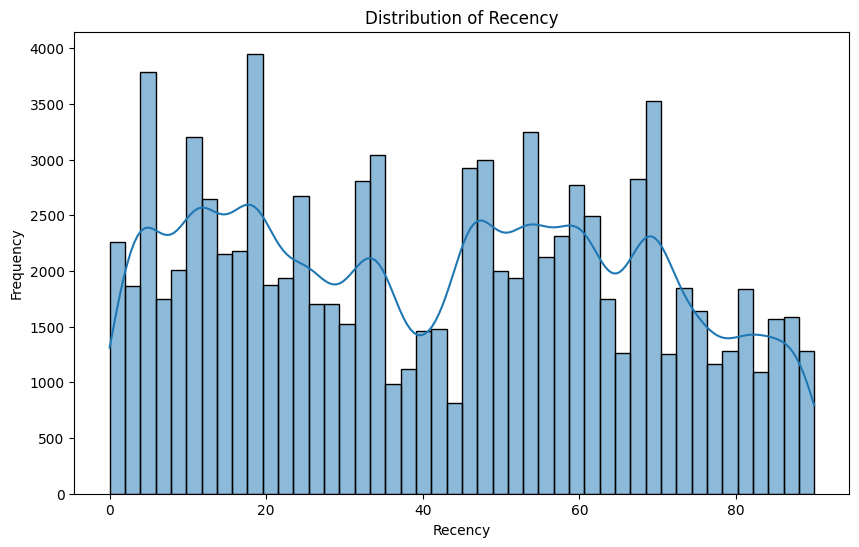

In [10]:
def plot_recency_distribution(data, column='Recency'):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title('Distribution of Recency')
    plt.xlabel('Recency')
    plt.ylabel('Frequency')
    plt.show()

plot_recency_distribution(data)

Plot distribution of Frequency

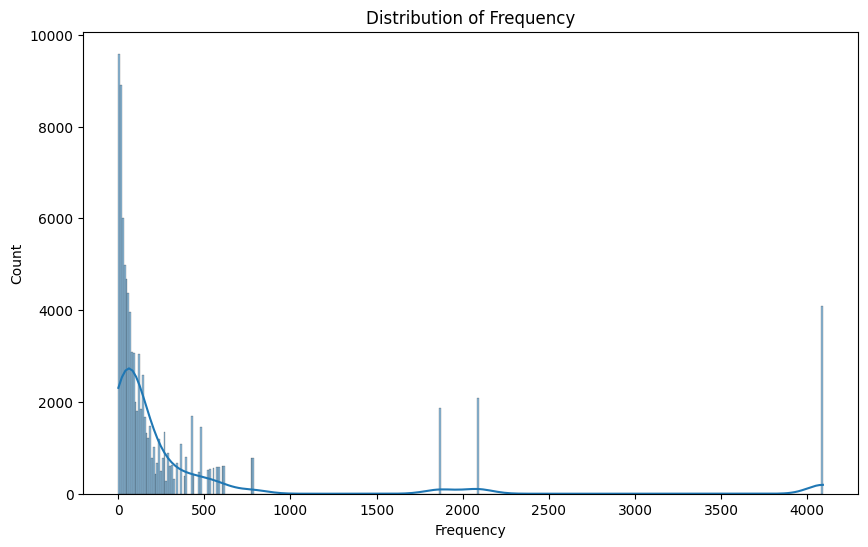

In [11]:
def plot_frequency_distribution(data, column='Frequency'):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title('Distribution of Frequency')
    plt.xlabel('Frequency')
    plt.ylabel('Count')
    plt.show()


plot_frequency_distribution(data)

Plot distribution of Monetary

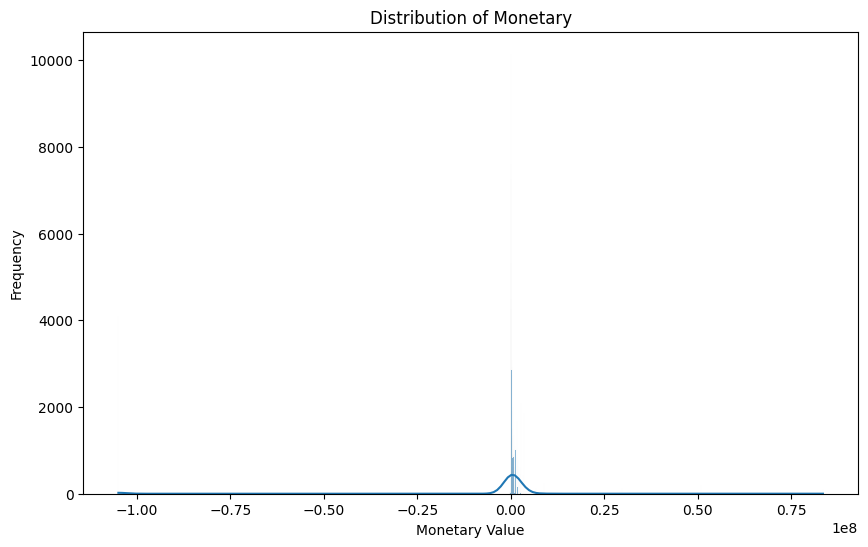

In [12]:
def plot_monetary_distribution(data, column='Monetary'):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title('Distribution of Monetary')
    plt.xlabel('Monetary Value')
    plt.ylabel('Frequency')
    plt.show()


plot_monetary_distribution(data)

Plot distribution of Seasonality (Month)

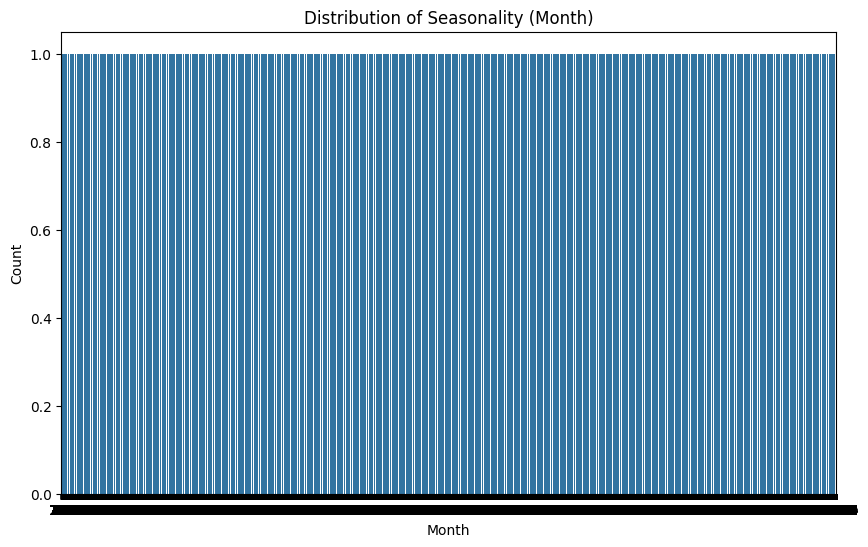

In [19]:
def plot_seasonality_distribution(data, column='Seasonality'):
    plt.figure(figsize=(10, 6))
    sns.countplot(data[column])
    plt.title('Distribution of Seasonality (Month)')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.show()
 

plot_seasonality_distribution(data)

In [36]:
print(data[['Recency', 'Frequency', 'Monetary','Seasonality']].describe())


            Recency     Frequency      Monetary   Seasonality
count  95662.000000  95662.000000  9.566200e+04  95662.000000
mean      41.801175    392.982982 -3.599090e+06      7.449447
std       25.588896    878.631072  2.180271e+07      5.229396
min        0.000000      1.000000 -1.049000e+08      1.000000
25%       18.000000     32.000000  6.000000e+04      1.000000
50%       43.000000     93.000000  2.015113e+05     11.000000
75%       63.000000    273.000000  7.089360e+05     12.000000
max       90.000000   4091.000000  8.345124e+07     12.000000


Step 2: Classify Users

classify users into "good" and "bad" based on their RFMS scores. in credit scoring, customers with low recency, high frequency, and high monetary values might be considered less risky, while those with high recency and low frequency might be flagged as higher risk.

Recency Thresholds: Users with a Recency of 18 days or less are considered "good", while those with 63 days or more are considered "bad".
Frequency Thresholds: Users with a Frequency of 273 transactions or more are considered "good", while those with 32 transactions or less are considered "bad".
Monetary Thresholds: Users with a Monetary value of 708,936 or more are considered "good", while those with 60,000 or less are considered "bad".
Any user who does not clearly fall into the "good" or "bad" category based on these strict thresholds is classified as "average".

In [57]:


def classify_users(data, recency_threshold, frequency_threshold, monetary_threshold):
    conditions = [
        (data['Recency'] <= recency_threshold['good']) &
        (data['Frequency'] >= frequency_threshold['good']) &
        (data['Monetary'] >= monetary_threshold['good']),
        
        (data['Recency'] > recency_threshold['bad']) |
        (data['Frequency'] <= frequency_threshold['bad']) |
        (data['Monetary'] <= monetary_threshold['bad'])
    ]
    
    choices = ['good', 'bad']
    data['RFMS_Score'] = np.select(conditions, choices, default='average')
    return data

# Define thresholds based on quartiles
thresholds = {
    'recency': {'good': 18, 'bad': 63},
    'frequency': {'good': 273, 'bad': 32},
    'monetary': {'good': 708936, 'bad': 60000}
}

# Classify users
data = classify_users(data, thresholds['recency'], thresholds['frequency'], thresholds['monetary'])

# Check the results
data['RFMS_Score'].value_counts()


RFMS_Score
bad        47839
average    43600
good        4223
Name: count, dtype: int64

In [55]:


def classify_users(data, recency_threshold, frequency_threshold, monetary_threshold, seasonality_threshold):
    conditions = [
        (data['Recency'] <= recency_threshold['good']) &
        (data['Frequency'] >= frequency_threshold['good']) &
        (data['Monetary'] >= monetary_threshold['good']) &
        (data['Seasonality'].isin(seasonality_threshold['high_season'])),
        
        (data['Recency'] > recency_threshold['bad']) |
        (data['Frequency'] <= frequency_threshold['bad']) |
        (data['Monetary'] <= monetary_threshold['bad']) |
        (data['Seasonality'].isin(seasonality_threshold['low_season']))
    ]
    
    choices = ['good', 'bad']
    data['RFMS_Score'] = np.select(conditions, choices, default='average')
    return data

# Define thresholds based on quartiles
thresholds = {
    'recency': {'good': 18, 'bad': 63},
    'frequency': {'good': 273, 'bad': 32},
    'monetary': {'good': 708936, 'bad': 60000},
    'seasonality': {'high_season': [11, 12,10], 'low_season': [1,2, 3, 4, 5, 6, 7, 8, 9]}
}

# Classify users
data = classify_users(data, thresholds['recency'], thresholds['frequency'], thresholds['monetary'], thresholds['seasonality'])

# Check the results
data['RFMS_Score'].value_counts()



RFMS_Score
bad        70306
average    24601
good         755
Name: count, dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  int64              
 1   BatchId               95662 non-null  int64              
 2   AccountId             95662 non-null  int64              
 3   SubscriptionId        95662 non-null  int64              
 4   CustomerId            95662 non-null  int64              
 5   CurrencyCode          95662 non-null  int32              
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  int64              
 8   ProductId             95662 non-null  int64              
 9   ProductCategory       95662 non-null  int32              
 10  ChannelId             95662 non-null  int64              
 11  Amount                95662 non-null  float64            
 12  Valu

In [58]:
# Select RFMS columns
rfms_data = data[['Recency', 'Frequency', 'Monetary']]

# Ensure RFMS columns are numeric
rfms_data = rfms_data.apply(pd.to_numeric, errors='coerce')

# Handle missing values by filling them with the mean of the column
rfms_data = rfms_data.fillna(rfms_data.mean())

# Standardize the data
scaler = StandardScaler()
rfms_scaled = scaler.fit_transform(rfms_data)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(rfms_scaled)

# Analyze clusters - select only numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
cluster_means = data.groupby('Cluster')[numeric_columns].mean()
cluster_means

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Amount,Value,PricingStrategy,FraudResult,Recency,Frequency,Monetary,Month,Seasonality,Cluster
Cluster,,,,,,,,,,,,,,,,,,,,,
0,70296.075909,68234.479161,3263.544867,2899.713765,2953.747267,0.0,256.0,4.698574,7.635328,1.258905,...,9746.114605,10988.539856,2.202446,0.002619,17.816958,163.075499,9.420732e+05,1.359206,3.870821,0.0
1,69554.171841,118284.212662,4249.000000,4429.000000,7343.000000,0.0,256.0,4.000000,5.956490,0.000000,...,-25641.652408,25641.652408,3.999022,0.000000,52.725006,4091.000000,-1.049000e+08,6.572476,12.000000,1.0
2,70436.836939,68538.498059,3375.706103,3016.126492,2924.503074,0.0,256.0,4.675409,7.345383,1.326459,...,6705.625442,7547.255796,2.155676,0.001636,62.958249,287.370455,9.123466e+05,11.362503,10.355559,2.0


Visualize the Clusters

Use visualizations to help understand the clusters better.

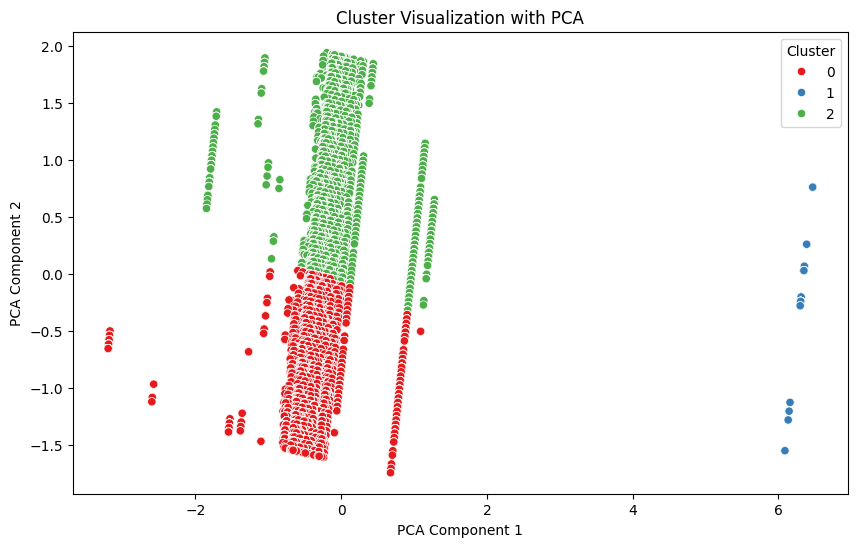

In [59]:

# Visualize clusters in 2D space using first two principal components (PCA)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfms_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=data['Cluster'], palette='Set1')
plt.title('Cluster Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


Cluster 1 (Blue): High-value customers are labeled as "good".
Cluster 0 (Red): Moderate-value customers are labeled as "average".
Cluster 2 (Green): Higher risk customers are labeled as "bad".

In [61]:
# Based on the analysis, we assign good and bad labels to the clusters
def assign_risk_labels(cluster):
    if cluster == 1:
        return 'good'
    elif cluster == 0:
        return 'average'
    elif cluster == 2:
        return 'bad'
    
# Apply the function to assign labels
data['Risk_Label'] = data['Cluster'].apply(assign_risk_labels)

# Verify the distribution of labels
print(data['Risk_Label'].value_counts())

# Show the first few rows to verify the labels
data.head()


Risk_Label
bad        47663
average    43908
good        4091
Name: count, dtype: int64


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,Recency,Frequency,Monetary,Month,Seasonality,RFMS_Score,Cluster,Risk_Label
0,76871,36123,3957,887,4406,0,256,6,10,0,...,2,0,90,119,109921.75,11,11,bad,2,bad
1,73770,15642,4841,3829,4406,0,256,4,6,2,...,2,0,90,119,109921.75,11,11,bad,2,bad
2,26203,53941,4229,222,4683,0,256,6,1,0,...,2,0,90,2,1000.00,11,11,bad,2,bad
3,380,102363,648,2185,988,0,256,1,21,8,...,2,0,90,38,228727.20,11,12,bad,2,bad
4,28195,38780,4841,3829,988,0,256,4,6,2,...,2,0,90,38,228727.20,11,12,bad,2,bad
